## Extracting all Images 

### Import all libraries

Note:

pip install opencv-python

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
%matplotlib inline

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [7]:
data_file = '../data/mnist.csv'

In [8]:
digits_df = pd.read_csv( data_file )

In [9]:
digits_df.head( 5 )

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create a Directory and Extract all images

In [10]:
import os

In [11]:
image_dir = './mnist/'

if not os.path.exists(image_dir):
    os.makedirs(image_dir)

### For reading into numpy arrays

In [27]:
labels = digits_df.iloc[0:,0].astype(np.int32)
image_buffer = digits_df.iloc[0:,1:].values
labels_np = np.array( labels )

In [28]:
labels_np[0:5]

array([1, 0, 1, 4, 0], dtype=int32)

In [29]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
image_buffer.shape

(42000, 784)

In [31]:
dataset = zip(labels, image_buffer)

The images are 28 x 28 pixel images

### Verifying images

In [32]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


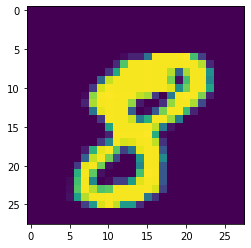

In [33]:
print_image( 10 )

### How images actually look like?

In [34]:
np.set_printoptions(precision=4, linewidth=120)

In [35]:
image_buffer[10].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255, 180,  48,   0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 186, 252, 252, 253, 252, 252, 252, 252, 253, 252, 227,  29,   0],
       [  0,   0,   0,   0,   0,  38, 155, 252, 252, 252, 253, 252, 252, 227,  79, 222, 252, 252, 129,   0],
       [  0,   0,   0,   0,  85, 233, 252, 252, 252, 252, 253, 252, 252, 202,  11, 180, 252, 252, 119,   0],
       [  0,   0,   0,  43, 240, 253, 252, 252, 252, 252, 253, 252, 252, 244, 126, 201, 252, 252, 150,   0],
       [  0,   0,   7, 212, 253, 255, 253, 253, 253, 232, 221,  42,   0, 104, 253, 255, 253, 205,  21,   0],
       [  0,   0,  25, 223, 252, 253, 252, 252, 214,  18,   0,   0,  34, 215, 252, 253, 223,  56,   0,   0],
       [  0,   0,   0,  99, 246, 253, 252, 252,  77,   0,   7,  70, 203, 252, 252, 173,  25,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [36]:
image_buffer[0].shape

(784,)

### Reshaping all images

In [37]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [38]:
reshaped_images.shape

(42000, 28, 28)

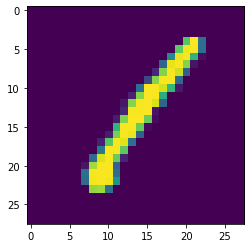

In [39]:
plt.imshow(reshaped_images[0]);

## Classifying Digits

### Importing all required libraries

In [107]:
import tensorflow as tf
from tensorflow import keras

In [43]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


### Set X and Y

In [44]:
X = reshaped_images

In [45]:
y = keras.utils.to_categorical( labels_np )

In [46]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Splitting datasets into train and test

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [49]:
X_train.shape

(33600, 28, 28)

In [50]:
X_test.shape

(8400, 28, 28)

In [51]:
y_train.shape

(33600, 10)

In [52]:
y_test.shape

(8400, 10)

In [53]:
input_shape = X_train.shape[-2:]

In [54]:
print(input_shape)

(28, 28)


### Train a model

In [55]:
# import necessary building blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation

### Neural Networks Architecture 

- Layer
- Neurons
- Activation

In [56]:
model = Sequential()

model.add(Dense(64, input_shape=input_shape))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Flatten())

model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

### Explain number of parameters need to be trainined

- All the links (compute)

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 64)            1856      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
activation (Activation)      (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                57376     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

### Loss Function

### Gradient Descent

- Learning Rate
- Optimizers

In [58]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### Training Model

- Epochs
- Batch Size

In [59]:
EPOCHS = 10
BATCH_SIZE = 128

In [60]:
%%time 
# fit model
history = model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.3,
    shuffle = True,
    verbose=1,
)

Epoch 1/10
184/184 [==============================] - 1s 3ms/step - loss: 2.4574 - accuracy: 0.4017 - val_loss: 1.3173 - val_accuracy: 0.5684
Epoch 2/10
184/184 [==============================] - 0s 3ms/step - loss: 1.1197 - accuracy: 0.6622 - val_loss: 0.9968 - val_accuracy: 0.7526
Epoch 3/10
184/184 [==============================] - 0s 2ms/step - loss: 0.8351 - accuracy: 0.7750 - val_loss: 0.7379 - val_accuracy: 0.8084
Epoch 4/10
184/184 [==============================] - 0s 2ms/step - loss: 0.5973 - accuracy: 0.8355 - val_loss: 0.6108 - val_accuracy: 0.8451
Epoch 5/10
184/184 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8797 - val_loss: 0.4942 - val_accuracy: 0.8787
Epoch 6/10
184/184 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.9016 - val_loss: 0.4522 - val_accuracy: 0.8979
Epoch 7/10
184/184 [==============================] - 0s 2ms/step - loss: 0.2904 - accuracy: 0.9198 - val_loss: 0.3612 - val_accuracy: 0.9151
Epoch 

In [67]:
history.history

{'loss': [2.457425594329834,
  1.1196887493133545,
  0.8351055979728699,
  0.5973169207572937,
  0.4392152428627014,
  0.35333800315856934,
  0.2903845012187958,
  0.2307083010673523,
  0.19185228645801544,
  0.168294295668602],
 'accuracy': [0.40174320340156555,
  0.6622449159622192,
  0.7749574780464172,
  0.8355017304420471,
  0.8797193765640259,
  0.901573121547699,
  0.9198129177093506,
  0.9362670183181763,
  0.9443027377128601,
  0.953316330909729],
 'val_loss': [1.3173024654388428,
  0.9967668056488037,
  0.7378917932510376,
  0.6107873916625977,
  0.4942452609539032,
  0.4521583616733551,
  0.36118271946907043,
  0.33215248584747314,
  0.3310241103172302,
  0.3266308307647705],
 'val_accuracy': [0.5683531761169434,
  0.752579391002655,
  0.8084325194358826,
  0.8451389074325562,
  0.8786706328392029,
  0.8979166746139526,
  0.9150793552398682,
  0.9278770089149475,
  0.9279761910438538,
  0.9305555820465088]}

In [115]:
# summarize history for accuracy

def plot_train_val_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [116]:
# summarize history for loss

def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

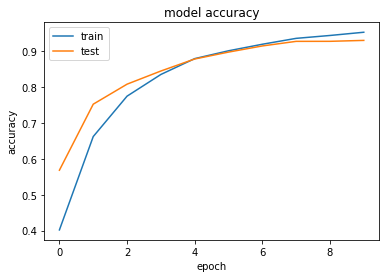

In [70]:
plot_train_val_accuracy(history.history)

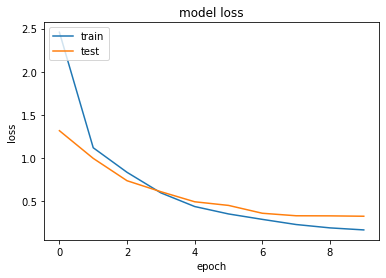

In [71]:
plot_train_val_loss(history.history)

### Predict and Evaluate

In [72]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

263/263 [==============================] - 0s 920us/step - loss: 0.3028 - accuracy: 0.9276

Test accuracy:  0.9276190400123596


In [73]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


### Verifying Predictions

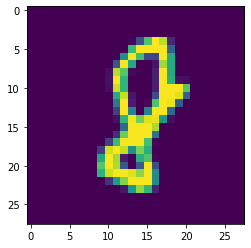

In [74]:
plt.imshow(X_test[0])

In [75]:
predictions[0]

8

In [76]:
len(X_test)

8400

### Randomly show a set of images and predictions

In [77]:
import random 

all_indexes = list(range(len(X_test)))
test_indexes = random.sample( all_indexes, 15 )

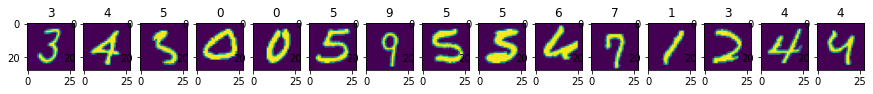

In [78]:
k = 1
plt.figure( figsize=(15, 6))
for i in test_indexes:
    plt.subplot(1, 15, k);
    plt.imshow(X_test[i])
    plt.title(str(predictions[i]))
    k = k + 1
plt.show()

### Confusion Matrix

In [79]:
np_label_list = list(np.unique(labels_np))

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
y_pred_classes = model.predict_classes(X_test)

In [82]:
y_actual_classes = np.argmax(y_test, axis=1)

In [83]:
y_pred_classes

array([8, 1, 9, ..., 3, 0, 9])

In [84]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [85]:
confusion_matrix(y_pred_classes, y_actual_classes)

array([[792,   0,   9,   3,   3,  17,  17,   4,   8,   2],
       [  0, 890,  19,   1,   0,   1,   2,   5,   5,   2],
       [  0,   4, 753,  14,   0,   3,   3,   8,   3,   3],
       [  1,   1,  14, 849,   1,   8,   1,   2,   7,   6],
       [  0,   2,   3,   0, 769,   0,   0,   2,   1,  14],
       [  5,   2,   9,  29,   3, 640,   2,   8,  15,  11],
       [ 15,   1,   9,   1,  14,  13, 756,   0,   4,   0],
       [  1,   1,   7,   5,   4,   3,   0, 812,   3,  30],
       [  2,   8,  22,  22,   4,  15,   4,  10, 785,  24],
       [  0,   0,   1,  13,  41,   2,   0,  42,   4, 746]])

In [86]:
import seaborn as sn

In [87]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(7, 6))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


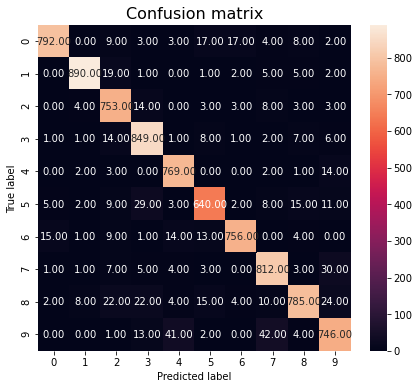

In [88]:
plot_confustion_matrix(y_pred_classes, y_actual_classes)

### Exercise: Build a deeper model

- Add one more layers with 128 neurons

# Convolution Neural Networks (CNN)
## What is Convolution?

- Filter
- Kernel Size

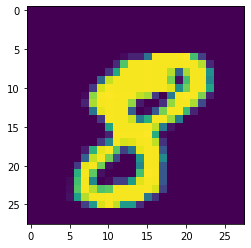

In [89]:
plt.grid(False)
plt.imshow( image_buffer[10].reshape(28, 28));

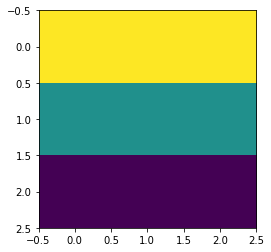

In [90]:
top=[[ 1, 1, 1],
     [ 0, 0, 0],     
     [ -1, -1, -1]]
plt.grid(False)
plt.imshow(top);

In [91]:
from scipy.ndimage.filters import correlate, convolve

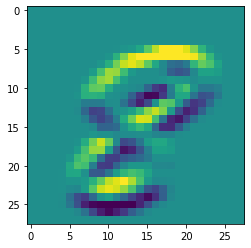

In [92]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   top)
plt.grid(False)
plt.imshow(convtop);

In [93]:
np.rot90(top, 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

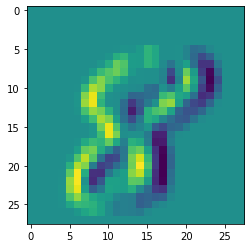

In [94]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   np.rot90(top, 1))
plt.grid(False)
plt.imshow(convtop);

## CNN Model

- Strides
- Padding
- MaxPooling

In [98]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [99]:
X_train_shape = X_train.shape
print(X_train_shape)

(33600, 28, 28)


In [100]:
X_test_shape = X_test.shape
print(X_test_shape)

(8400, 28, 28)


In [101]:
X_train_reshaped = X_train.reshape(X_train_shape[0],
                                   X_train_shape[1],
                                   X_train_shape[2], 1)

X_test_reshaped = X_test.reshape(X_test_shape[0],
                                 X_test_shape[1],
                                 X_test_shape[2], 1)

In [102]:
new_input_shape = (X_train_shape[1],X_train_shape[2], 1)

In [103]:
new_input_shape

(28, 28, 1)

### Model 1 

- Conv2D -> Dense(10) -> Softmax

In [108]:
tf.keras.backend.clear_session() # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model.add(Activation('relu'))
                            
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [109]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
____________________________________________________

In [110]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [111]:
%%time

history = model.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
263/263 [==============================] - 2s 8ms/step - loss: 5.6700 - accuracy: 0.8045 - val_loss: 1.2004 - val_accuracy: 0.9012
Epoch 2/10
263/263 [==============================] - 2s 8ms/step - loss: 0.8092 - accuracy: 0.9226 - val_loss: 0.6330 - val_accuracy: 0.9313
Epoch 3/10
263/263 [==============================] - 2s 8ms/step - loss: 0.4465 - accuracy: 0.9426 - val_loss: 0.4366 - val_accuracy: 0.9439
Epoch 4/10
263/263 [==============================] - 2s 8ms/step - loss: 0.2884 - accuracy: 0.9551 - val_loss: 0.3748 - val_accuracy: 0.9485
Epoch 5/10
263/263 [==============================] - 2s 9ms/step - loss: 0.2179 - accuracy: 0.9609 - val_loss: 0.3001 - val_accuracy: 0.9557
Epoch 6/10
263/263 [==============================] - 2s 8ms/step - loss: 0.1511 - accuracy: 0.9686 - val_loss: 0.2957 - val_accuracy: 0.9542
Epoch 7/10
263/263 [==============================] - 2s 9ms/step - loss: 0.1242 - accuracy: 0.9725 - val_loss: 0.2604 - val_accuracy: 0.9579
Epoch 

### Plotting Loss and Accuracy

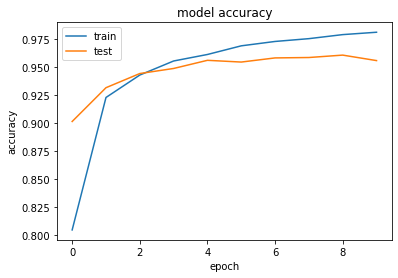

In [118]:
plot_train_val_accuracy(history.history)

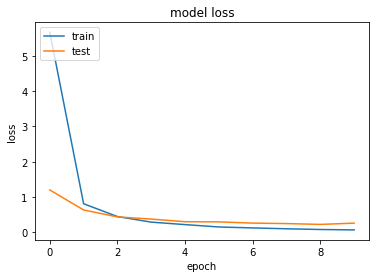

In [119]:
plot_train_val_loss(history.history)

### Model 2:

- Conv2D -> Dense(32) -> Dense(10) -> Softmax

In [121]:
tf.keras.backend.clear_session() # clear default graph

model2 = Sequential()
model2.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model2.add(Activation('relu'))
                            
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(32))    
model2.add(Activation('relu'))

model2.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model2.add(Activation('softmax'))

In [122]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [123]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [124]:
BATCH_SIZE = 64
EPOCHS = 10

In [125]:
%%time

history2 = model2.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 3s 5ms/step - loss: 1.4375 - accuracy: 0.7036 - val_loss: 0.6557 - val_accuracy: 0.8604
Epoch 2/10
525/525 [==============================] - 3s 5ms/step - loss: 0.3961 - accuracy: 0.9139 - val_loss: 0.2571 - val_accuracy: 0.9361
Epoch 3/10
525/525 [==============================] - 3s 5ms/step - loss: 0.1852 - accuracy: 0.9518 - val_loss: 0.1956 - val_accuracy: 0.9506
Epoch 4/10
525/525 [==============================] - 3s 5ms/step - loss: 0.1223 - accuracy: 0.9654 - val_loss: 0.1574 - val_accuracy: 0.9586
Epoch 5/10
525/525 [==============================] - 3s 5ms/step - loss: 0.0869 - accuracy: 0.9742 - val_loss: 0.1404 - val_accuracy: 0.9650
Epoch 6/10
525/525 [==============================] - 3s 5ms/step - loss: 0.0670 - accuracy: 0.9801 - val_loss: 0.1350 - val_accuracy: 0.9671
Epoch 7/10
525/525 [==============================] - 3s 5ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.1208 - val_accuracy: 0.9675
Epoch 

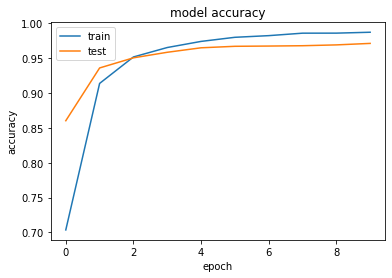

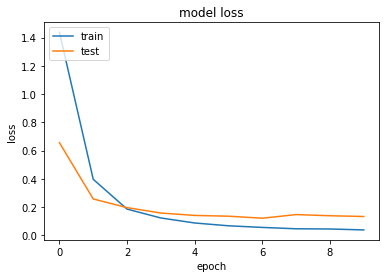

In [127]:
plot_train_val_accuracy(history2.history)

plot_train_val_loss(history2.history)

### Model 3: 

In [129]:
tf.keras.backend.clear_session()  # clear default graph

model3 = Sequential()
model3.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model3.add(Activation('relu'))
                            
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model3.add(Activation('relu'))
                            
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
    
model3.add(Dense(32))    
model3.add(Activation('relu'))

model3.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model3.add(Activation('softmax'))

In [130]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 200)               0

In [131]:
model3.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [132]:
%%time

history3 = model3.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 4s 7ms/step - loss: 2.0369 - accuracy: 0.6604 - val_loss: 0.4336 - val_accuracy: 0.8789
Epoch 2/10
525/525 [==============================] - 4s 7ms/step - loss: 0.3017 - accuracy: 0.9118 - val_loss: 0.2452 - val_accuracy: 0.9314
Epoch 3/10
525/525 [==============================] - 4s 7ms/step - loss: 0.1818 - accuracy: 0.9470 - val_loss: 0.1698 - val_accuracy: 0.9507
Epoch 4/10
525/525 [==============================] - 4s 7ms/step - loss: 0.1359 - accuracy: 0.9589 - val_loss: 0.1463 - val_accuracy: 0.9581
Epoch 5/10
525/525 [==============================] - 4s 7ms/step - loss: 0.1105 - accuracy: 0.9661 - val_loss: 0.1266 - val_accuracy: 0.9651
Epoch 6/10
525/525 [==============================] - 4s 8ms/step - loss: 0.0926 - accuracy: 0.9715 - val_loss: 0.1077 - val_accuracy: 0.9692
Epoch 7/10
525/525 [==============================] - 4s 8ms/step - loss: 0.0790 - accuracy: 0.9744 - val_loss: 0.1012 - val_accuracy: 0.9708
Epoch 

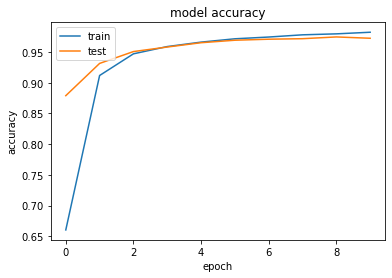

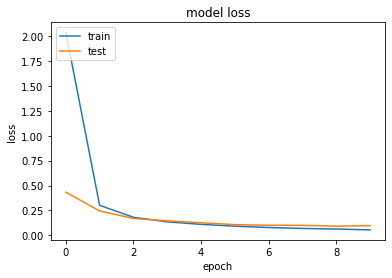

In [133]:
plot_train_val_accuracy(history3.history)

plot_train_val_loss(history3.history)

In [134]:
predictions_3 = model3.predict_classes(X_test_reshaped)

predictions_3 = list(predictions_3)

/opt/anaconda3/envs/trainingnew/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


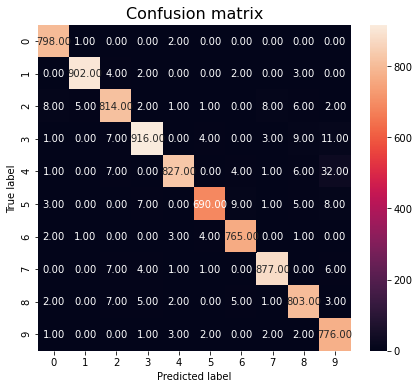

In [135]:
plot_confustion_matrix(predictions_3, 
                       y_actual_classes)

In [136]:
from sklearn import metrics

In [137]:
metrics.accuracy_score(predictions_3, 
                       y_actual_classes)

0.9723809523809523

### Which digits have gone wrong?

In [138]:
y_actual_classes_list = list(y_actual_classes) 

In [139]:
digit_indexes = [i for i, val in enumerate(y_actual_classes_list) if val == 5]

In [140]:
misclassfied_indexes = [i for i in digit_indexes if y_actual_classes_list[i] != predictions_3[i]]

In [141]:
misclassfied_indexes

[164, 445, 1233, 2199, 2814, 4733, 4803, 5602, 7148, 7811, 8302, 8368]

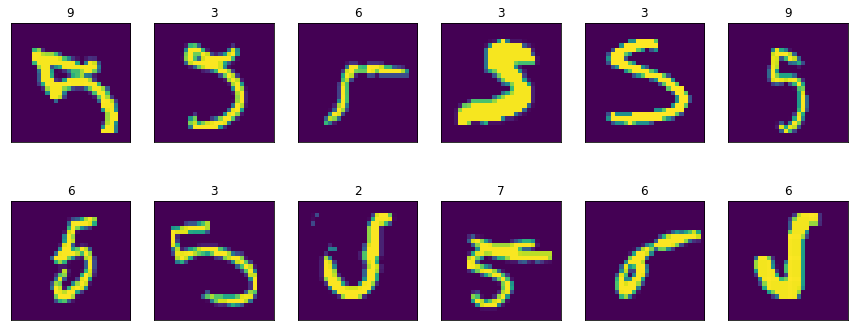

In [142]:
k = 1
plt.figure( figsize=(15, 6))
for i in misclassfied_indexes:
    plt.subplot(2, len(misclassfied_indexes)/2, k);
    plt.xticks([])
    plt.yticks([])    
    plt.imshow(X_test[i])
    plt.title(str(predictions_3[i]) + str())
    k = k + 1
plt.show()

### Saving Model

In [143]:
model3.save('digits_model_3.h5')

In [144]:
!ls -al

total 6672
drwxr-xr-x  14 manaranjan  staff      476 Aug 29 14:34 .
drwxr-xr-x   7 manaranjan  staff      238 Aug 28 20:45 ..
-rw-r--r--@  1 manaranjan  staff     6148 Aug 29 09:56 .DS_Store
drwxr-xr-x   6 manaranjan  staff      204 Aug 29 10:29 .ipynb_checkpoints
-rw-r--r--@  1 manaranjan  staff   110076 Aug 23 17:04 Boston House - NN Model 1.0.ipynb
-rw-r--r--   1 manaranjan  staff   583461 Aug 29 09:55 House_Price_Analysis_New_2.0.ipynb
-rw-r--r--@  1 manaranjan  staff   305224 Aug 23 17:03 IMDB Classification - BoW and Embeddings.ipynb
-rw-r--r--@  1 manaranjan  staff   105856 Aug 23 17:04 IMDB Classification - Sequence Modelling.ipynb
-rw-r--r--@  1 manaranjan  staff   259018 Aug 29 14:32 MNIST Digit Classification.ipynb
-rw-r--r--@  1 manaranjan  staff   231804 Aug 29 10:20 Scania Truck Failure Prediction 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff    30151 Aug 29 10:27 Sentiment Analysis 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff  1631699 Aug 23 17:20 Tomato+Transfer+Learning+-+B

## Load model and make prediction

In [148]:
from tensorflow.keras.models import load_model

new_model = load_model('digits_model_3.h5')

In [149]:
predictions_new = new_model.predict_classes(X_test_reshaped)

In [150]:
predictions_new[0:10]

array([8, 1, 9, 9, 8, 5, 2, 2, 7, 1])

### Dive Deeper into the Model Weights

In [151]:
weights = model3.get_weights()

#### Checking the weights metrics dimensions

In [152]:
weights[0].shape

(3, 3, 1, 8)

In [153]:
weights[1].shape

(8,)

In [154]:
weights[2].shape

(3, 3, 8, 8)

In [155]:
weights[3].shape

(8,)

In [156]:
weights[4].shape

(200, 32)

#### Get the first filter in first convolution layer

In [157]:
filter1 = weights[0][:,:,:,0:1].reshape(3, 3)

In [158]:
filter1

array([[ 0.0507,  0.1832,  0.0148],
       [-0.1064, -0.0728,  0.0197],
       [ 0.1038, -0.0117, -0.0189]], dtype=float32)

#### Applying the convolutions to one image

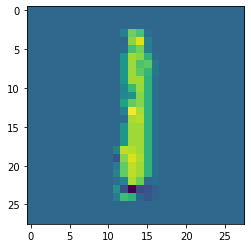

In [159]:
convtop = convolve(image_buffer[2].reshape(28, 28), 
                   filter1)
plt.grid(False)
plt.imshow(convtop);